# Con este código determinaremos la probabilidad de que una persona use o no internet.

In [10]:
# Se carga la libreria pandas
import pandas as pd

In [11]:
# Se cargan los datos y se visualiza los primeros de ellos
df = pd.read_csv('https://raw.githubusercontent.com/jsulopz/data/main/uso_internet_espana.csv')
df.head()

,Unnamed: 0,uso_internet,sexo,edad,estudios
0,1,0,Mujer,66,Primaria
1,2,1,Hombre,72,Primaria
2,3,1,Hombre,48,Medios universitarios
3,4,0,Hombre,59,Superiores
4,5,1,Mujer,44,Superiores


In [12]:
# Se visualizan 10 datos al azar
df.sample(10)

,Unnamed: 0,uso_internet,sexo,edad,estudios
1891,1908,1,Hombre,26,Primaria
467,470,1,Mujer,33,F.P.
1401,1415,1,Hombre,18,Primaria
900,908,1,Mujer,31,Secundaria
1833,1850,1,Mujer,24,Superiores
603,609,0,Hombre,59,Primaria
723,730,0,Mujer,44,Primaria
2047,2067,0,Hombre,38,F.P.
1549,1564,0,Hombre,70,Primaria
518,522,0,Mujer,41,Primaria


In [14]:
# Se convierte la variable sexo a numérica
Df=pd.get_dummies(data=df,drop_first=True)
Df.head()

,Unnamed: 0,uso_internet,edad,sexo_Mujer,estudios_Medios universitarios,estudios_Primaria,estudios_Secundaria,estudios_Sin estudios,estudios_Superiores
0,1,0,66,1,0,1,0,0,0
1,2,1,72,0,0,1,0,0,0
2,3,1,48,0,1,0,0,0,0
3,4,0,59,0,0,0,0,0,1
4,5,1,44,1,0,0,0,0,1


# Seleccionar variables

In [22]:
# Dividimos en variables explicativas, que son todas las variables excepto uso_internet, la cual es nuestro objetivo.
explicativas=Df.drop(columns='uso_internet')
objetivo=Df.uso_internet

# Entrenamiento del modelo DecisionTreeClassifier()

In [23]:
# Se utiliza el modelo DesicionTreeClassifier de la libreria sklearn
from sklearn.tree import DecisionTreeClassifier

In [35]:
# Utilizamos el modelo de árbol de decisión en una variable, el comando max_depth nos permite acortarlo dado que tiene muchas ramas
model=DecisionTreeClassifier(max_depth=3)

In [36]:
# Se genera la función fit que genera el modelo
model.fit(X=explicativas, y=objetivo)

DecisionTreeClassifier(max_depth=3)

# Visualización del modelo

In [39]:
# De la librería sklearn se importa la función para visualizar
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

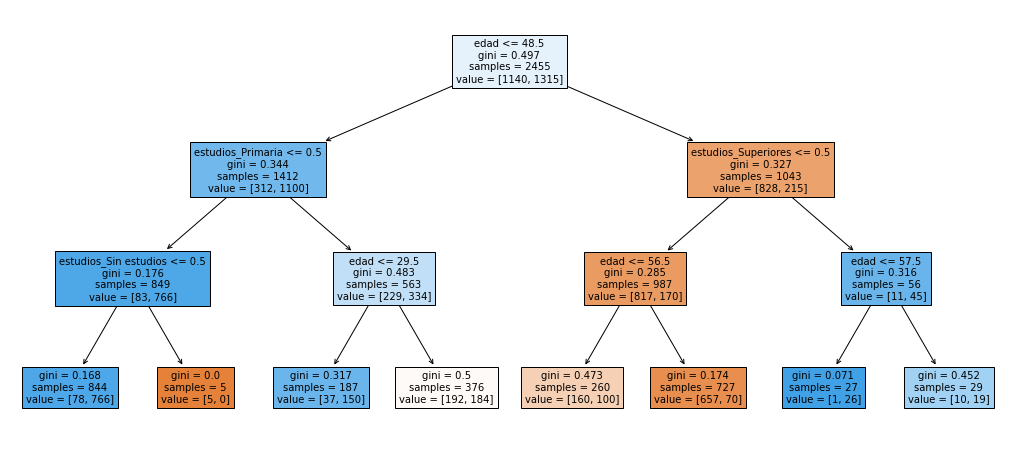

In [43]:
# Se visualiza el árbol, la primera línea es para el tamaño, el número de niveles proviene de max_depth
plt.figure(figsize=(18,8))
plot_tree(decision_tree=model, feature_names=explicativas.columns, filled=True, fontsize=10);

# Realizar una predicción

In [45]:
# Se selecciona una persona al azar, esta se guarda en la variable a
a=explicativas.sample()
a

,Unnamed: 0,edad,sexo_Mujer,estudios_Medios universitarios,estudios_Primaria,estudios_Secundaria,estudios_Sin estudios,estudios_Superiores
2152,2173,19,0,0,0,1,0,0


In [47]:
# Se calcula la probabilidad de que la persona a use internet, el primer número nos da la probabilidad de que no lo use y el segundo de que sí lo use
model.predict_proba(a)

array([[0.09241706, 0.90758294]])

In [51]:
# Se calcula el valor para todas las personas y se guarda en la variable y_pred
y_pred=model.predict(explicativas)

# Interpretación del modelo

In [52]:
# En el modelo se muestra como primer rama la edad.
# Para analizar el porqué se grafica un histograma.
import seaborn as sns

<AxesSubplot:xlabel='edad', ylabel='Count'>

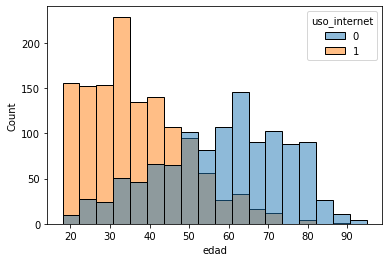

In [54]:
# El histograma contiene el dato edad vs uso internet
sns.histplot(x=df.edad,hue=df.uso_internet)

In [55]:
# Existe una gran diferencia entre las personas que han usado internet, 
# la cual pertenece a edades menores, color naranja, y las que no lo han usado, 
# en edades mayores, color azul. Por ello el modelo ha determinado a la edad
# como de mayor prioridad.

# Calidad del modelo

In [56]:
# Se colocan las predicciones en el dataframe
df['pred']=y_pred

In [57]:
# Se utiliza una muestra de 10 personas, de ahí se utiliza sólo las
# variables uso_internet y la predicción
df.sample(10)[['uso_internet','pred']]

,uso_internet,pred
1704,0,0
1703,1,1
1544,1,0
1138,0,0
1973,1,1
2327,1,0
1540,0,0
1722,0,0
769,0,0
2023,1,0


In [59]:
# Se observa que el modelo falló en la predicción de la persona 1544, 2327 y 2023

In [60]:
# Se comparan los aciertos del modelo
df['uso_internet']==df['pred']

0        True
1       False
2        True
3       False
4        True
        ...  
2450    False
2451     True
2452     True
2453     True
2454     True
Length: 2455, dtype: bool

In [61]:
# Se realiza la suma de los aciertos
(df['uso_internet']==df['pred']).sum()

1975

In [62]:
# Con porcentaje, utilizando las 2455 personas
(df['uso_internet']==df['pred']).sum()/2455 

0.8044806517311609

# La efectividad del modelo es del 80%